***COMP316 - Natural Language Processing***

***Final Project – 2023***

***Student Details:***

**Dylan Govender – 221040222**

**Ayush Harrishun – 220002773**



________________________________________________________________________________

##***(1) Using Autoreload and Link to All Our Resources***

***Autoreload***

In [1]:
#enable automatic reloading of imported modules.
%load_ext autoreload
%autoreload 2

***Link to all our resources, models, and datasets: https://drive.google.com/drive/folders/1Xya2yZ0St6jbCqf4MMIDY0y9Yx7-mBgP?usp=sharing***

##***(2) Installing Dependencies And Libraries***

In [2]:
!pip install nltk #perform tokenization and preprocessing
!pip install transformers #model used for training and testing
!pip install numpy  
!pip install pandas 
!pip install seaborn 
!pip install matplotlib #visualise data
!pip install wordcloud #visualise data
!pip install gdown  #initialise dataset

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 34.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 28.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 96.6 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.d

***Importing Dependencies And Libraries***

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sb

##***(3) Initialising The Datasets***

In [4]:
!gdown "https://drive.google.com/uc?export=download&id=1K1PkH02muJwRZXFlL3Juq6aUjy165ftc"
!gdown "https://drive.google.com/uc?export=download&id=1_QC7XccyXRhwe7nBn9zIDN0Oe8iHR32f"

real_df = pd.read_csv('True.csv')
fake_df = pd.read_csv('Fake.csv')

print("Shape of dataset:", real_df.shape)
print("Dataset columns", real_df.columns)
print("Shape of dataset:", fake_df.shape)
print("Dataset columns", fake_df.columns)

Downloading...
From: https://drive.google.com/uc?export=download&id=1K1PkH02muJwRZXFlL3Juq6aUjy165ftc
To: /content/True.csv
100% 53.6M/53.6M [00:00<00:00, 78.7MB/s]
Downloading...
From: https://drive.google.com/uc?export=download&id=1_QC7XccyXRhwe7nBn9zIDN0Oe8iHR32f
To: /content/Fake.csv
100% 62.8M/62.8M [00:01<00:00, 51.2MB/s]
Shape of dataset: (21417, 4)
Dataset columns Index(['title', 'text', 'subject', 'date'], dtype='object')
Shape of dataset: (23481, 4)
Dataset columns Index(['title', 'text', 'subject', 'date'], dtype='object')


##***(4) Displaying The Datasets***

In [5]:
print('Real News Dataset:')
display(real_df)
print('Fake News Dataset:')
display(fake_df)

Real News Dataset:


,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


Fake News Dataset:


,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


##***(5) Dataset Preparation***

In [6]:
from sklearn.utils import shuffle

#adding label columns to dataset whether they are real or not, real will be mapped to 1 and fake to 0, respectively
real_df['label'] = 1
fake_df['label'] = 0

#concat or combining both dataset into one main dataset
df = pd.concat([real_df, fake_df])

#shuffling the dataset
df = shuffle(df).reset_index(drop=True)

display(df)

print("\nShape of dataset:", df.shape)
print("Dataset columns", df.columns)

,title,text,subject,date,label
0,Obama on Trump victory: we are now all rooting...,WASHINGTON (Reuters) - U.S. President Barack O...,politicsNews,"November 9, 2016",1
1,WHY WAS THIS YOUNG MAN SPONSORED BY CAIR INVIT...,It s Hard To Know Who Obama Hates More America...,politics,"May 12, 2015",0
2,OBAMA WILL SKIP SCALIA FUNERAL: Here’s A List ...,With a battle heating up between Republicans a...,politics,"Feb 18, 2016",0
3,SOCIALIST BERNIE SANDERS Praises Castro [Video],A video from 1985 was shown last night during ...,left-news,"Mar 10, 2016",0
4,TUCKER CARLSON Calls Out Professor On His Clai...,"Another night, another idiot libtard who can t...",politics,"Dec 14, 2016",0
...,...,...,...,...,...
44893,Trump's concession on wall funding removes obs...,WASHINGTON (Reuters) - The threat of a U.S. go...,politicsNews,"April 25, 2017",1
44894,UNREAL! BENGHAZI LIAR SUSAN RICE Shows Her Rad...,You just can t make this stuff up we have a Na...,left-news,"May 12, 2016",0
44895,"China backs U.N. call for justice in Yemen, U....",GENEVA (Reuters) - China signaled on Wednesday...,worldnews,"September 13, 2017",1
44896,BREAKING VIDEO: HILLARY CLINTON Seen Being Lif...,Hillary Clinton 9/11 NYC pic.twitter.com/q9Yns...,politics,"Sep 11, 2016",0



Shape of dataset: (44898, 5)
Dataset columns Index(['title', 'text', 'subject', 'date', 'label'], dtype='object')


##***(6) Visualising Data Part I***

###***(6.1) Distribution of Fake and Real News***

Distribution of labels:
Fake = 0
Real = 1

Count each labels:
0    23481
1    21417
Name: label, dtype: int64

0    52.0
1    48.0
Name: label, dtype: float64



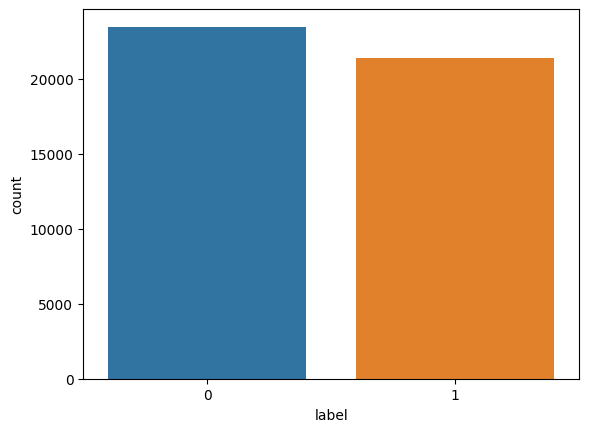

In [7]:
sb.countplot(x='label', data=df)
print('Distribution of labels:')
print('Fake = 0')
print('Real = 1')
print()
print('Count each labels:')
print(df.label.value_counts())
print()
print(round(df.label.value_counts(normalize=True), 2) * 100)
print()

###***(6.2) Subject Distribution Graphs***

***Subject Distribution Graph of Real Dataset***

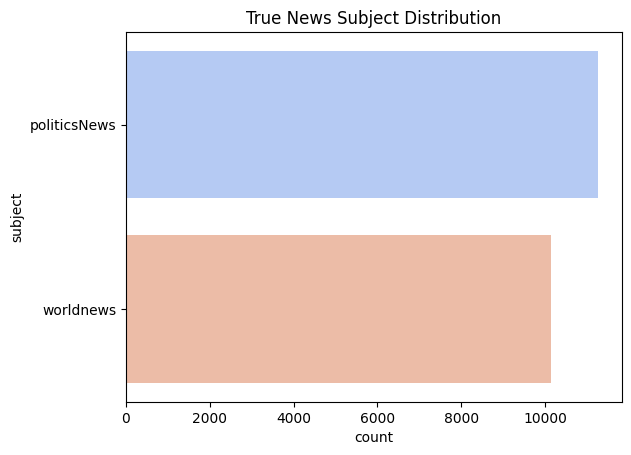

In [8]:
sb.countplot(y="subject", palette="coolwarm", data=real_df).set_title('True News Subject Distribution')
plot.show()

***Subject Distribution Graph of The Fake Dataset***

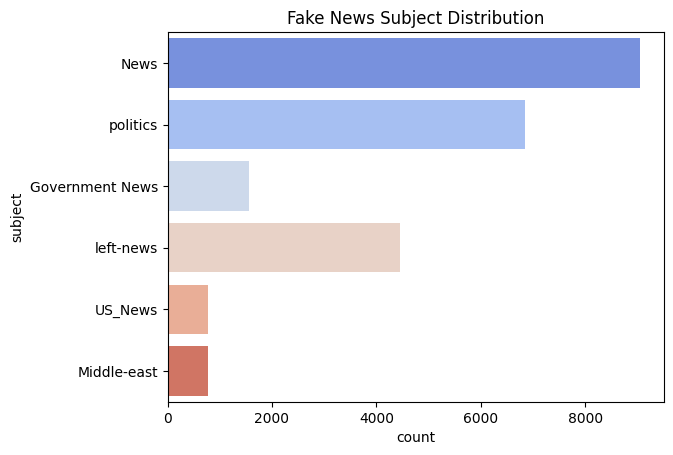

In [9]:
sb.countplot(y="subject", palette="coolwarm", data=fake_df).set_title('Fake News Subject Distribution')
plot.show()

***Subject Distribution of The Combined Dataset***

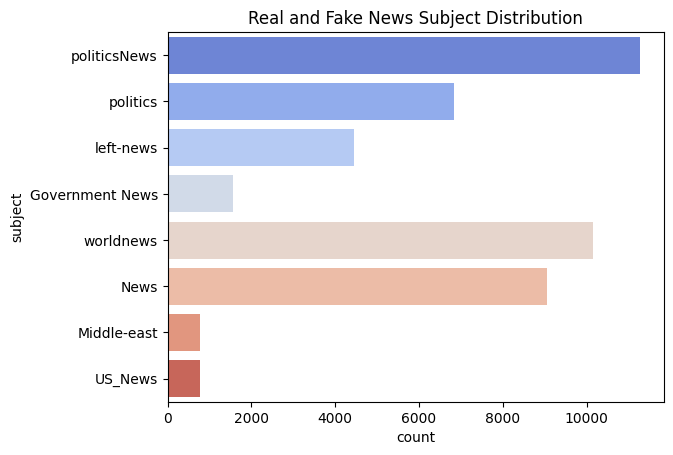

In [10]:
sb.countplot(y="subject", palette="coolwarm", data=df).set_title('Real and Fake News Subject Distribution')
plot.show()

###***(6.3) Statistics of the Title Column and Text Column***

***Title Column Statistics***

In [11]:
title_length = df.title.str.split().str.len()
title_length.describe()

count    44898.000000
mean        12.453472
std          4.111476
min          1.000000
25%         10.000000
50%         11.000000
75%         14.000000
max         42.000000
Name: title, dtype: float64

***Text Column Statistics***

In [12]:
text_length = df.text.str.split().str.len()
text_length.describe()

count    44898.000000
mean       405.282284
std        351.265595
min          0.000000
25%        203.000000
50%        362.000000
75%        513.000000
max       8135.000000
Name: text, dtype: float64

***NOTE:***
```
The title column is a short statement with an average of 12.45 words, and 75% of the entries are around 14 words.
The text column has a higher word count with an average of 405.28 words and 75% of the entries having more than 513 words.
```

***Title Column Length Graph***

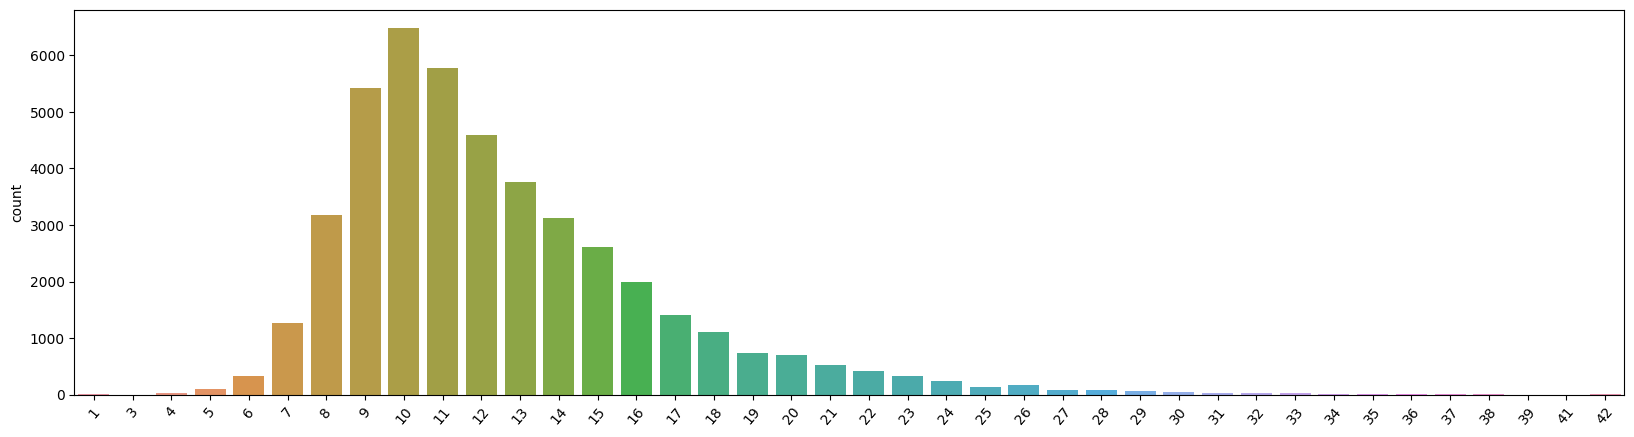

In [13]:
titles = [text for text in df.title]

max_length = 0
titles_length = []
for title in titles:
    titles_length.append(len(title.split()))
    max_length = max(len(title.split()), max_length)

plot.figure(figsize=(20,5))
graph = sb.countplot(x=titles_length)
graph.set_xticklabels(graph.get_xticklabels(), rotation=50)
plot.show()

##***(7) Data Cleaning and Preprocessing***

***`NOTE: We will only use the Title Column data to train our models, since we have enough data to work with.`***

***Data Cleaning and Preprocessing***

***NOTE:***
```
Since we only using Titles to train our models.
We only need to remove stopwords and words with length below 3.
Just in case, if we do have punctuation and unnecessary elements, we will use full data cleaning principles.
```

***Downloading Stopwords***

In [14]:
import nltk
nltk.download("stopwords")
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [15]:
import re
import gensim

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from collections import Counter
from sklearn.utils import shuffle

text_format = ['title']

porter_stemmer = PorterStemmer()
word_net_lemmatizer = nltk.stem.WordNetLemmatizer()
stopwords = stopwords.words('english')
stopwords.extend(['from', 'subject', 're', 'edu', 'use'])
stopwords_dictionary = Counter(stopwords)

#change null value(s) to NONE
def null_process(feature):
    for column in text_format:
        feature.loc[feature[column].isnull(), column] = "None"
    return feature

def clean_dataframe(df):
    #add null values
    clean_df = null_process(df)
    return clean_df

#using regex to remove unnecessary tokens or phrases from text
def clean_text(text):
    text = str(text).replace(r'http[\w:/\.]+', ' ') #removing urls
    text = str(text).replace(r'[^\.\w\s]', ' ') #remove everything but characters and punctuations
    text = str(text).replace(r'[^a-zA-Z]', ' ') #remove everything but letters
    text = str(text).replace(r'\s\s+', ' ') #remove all whitespaces
    text = text.lower().strip() #lowercase
    return text
     
#removing stopwords using gensim, and removing words with 2 or less characters
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3 and token not in stopwords_dictionary:
            result.append(token)
    return result

#preprocessing using NLTK include, stopword removal only
def nltk_preprocess(text):
    text = clean_text(text)
    wordlist = re.sub(r'[^\w\s]', ' ', text).split()
    text = ' '.join([word_net_lemmatizer.lemmatize(word) for word in wordlist if word not in stopwords_dictionary])
    return text

#remove unused columns, keep first ('title') and last ('label') columns only
df = df.iloc[:,[0, -1]]

#perform data cleaning on train and test dataset by calling clean_dataset function
df = clean_dataframe(df)

#apply preprocessing on title through apply method by calling the function nltk_preprocess
df['title'] = df.title.apply(nltk_preprocess)

#add a clean column with each title in a list format
df['clean'] = df.title.apply(preprocess)

#display new dataframe
display(df)

print("\nShape of dataset:", df.shape)
print("Dataset columns", df.columns)

,title,label,clean
0,obama trump victory rooting success,1,"[obama, trump, victory, rooting, success]"
1,young man sponsored cair invited white house,0,"[young, sponsored, cair, invited, white, house]"
2,obama skip scalia funeral list funeral busy at...,0,"[obama, skip, scalia, funeral, list, funeral, ..."
3,socialist bernie sander praise castro video,0,"[socialist, bernie, sander, praise, castro, vi..."
4,tucker carlson call professor claim russia sto...,0,"[tucker, carlson, professor, claim, russia, st..."
...,...,...,...
44893,trump concession wall funding remove obstacle ...,1,"[trump, concession, wall, funding, remove, obs..."
44894,unreal benghazi liar susan rice show radical r...,0,"[unreal, benghazi, liar, susan, rice, radical,..."
44895,china back u n call justice yemen u saudi,1,"[china, justice, yemen, saudi]"
44896,breaking video hillary clinton seen lifted van...,0,"[breaking, video, hillary, clinton, seen, lift..."



Shape of dataset: (44898, 3)
Dataset columns Index(['title', 'label', 'clean'], dtype='object')


##***(8) Visualising Data Part II***

###***(8.1) Univariate Analysis - Wordclouds***

***Wordcloud for Real News Only***

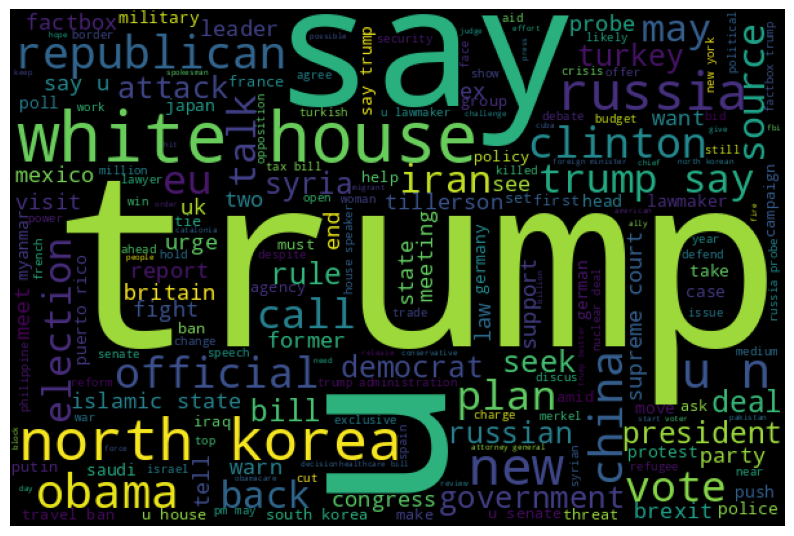

In [16]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plot

#initialize wordcloud
wordcloud = WordCloud(background_color='black', width=600, height=400)

#generate the word cloud
textcloud = wordcloud.generate(' '.join(df[df['label']==1]['title']))

#generate graph
plot.figure(figsize=(10,20))
plot.imshow(textcloud)
plot.axis('off')
plot.show()

***Wordcloud for Fake News Only***

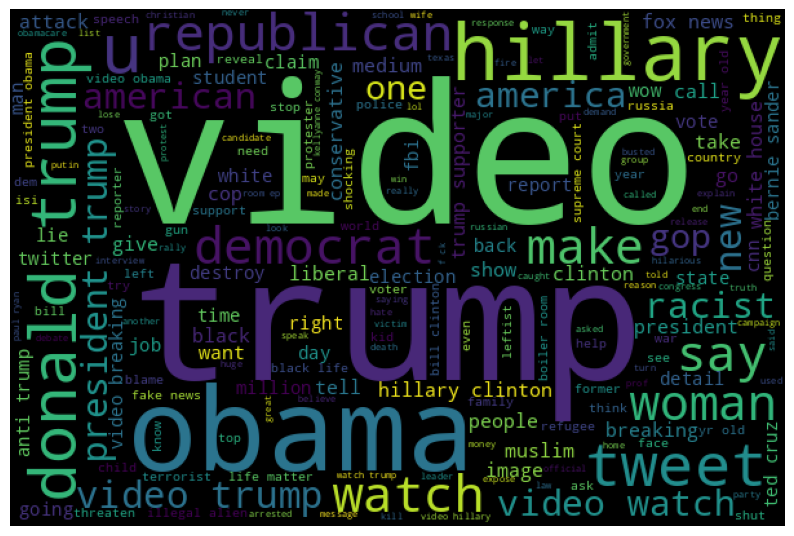

In [17]:
textcloud = wordcloud.generate(' '.join(df[df['label']==0]['title']))
plot.figure(figsize=(10,20))
plot.imshow(textcloud)
plot.axis('off')
plot.show()

###***(8.2) Bivariate Analysis - Bigrams and Trigrams***

In [18]:
import nltk

def plot_ngram_data(corpus, title, xlabel, ylabel, n):  
    real_ngram = (pd.Series(nltk.ngrams(corpus.split(), n)).value_counts())[:20]
    real_ngram.sort_values().plot.barh(color='blue', width=.9, figsize=(10, 6))
    plot.title(title)
    plot.ylabel(ylabel)
    plot.xlabel(xlabel)
    plot.show()

***Top 20 Frequently Occuring REAL News Bigrams***

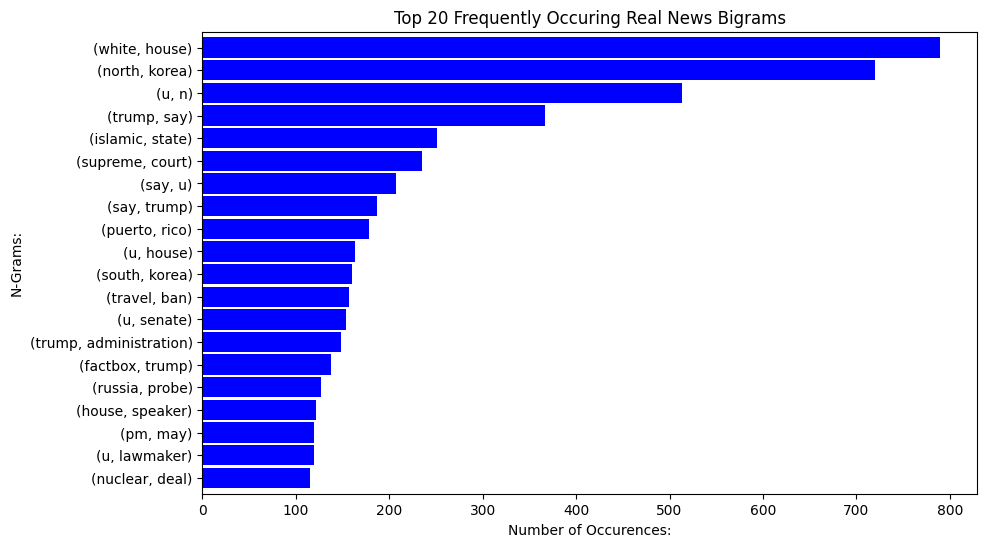

In [19]:
corpus = ' '.join(df[df['label']==1]['title'])
title = 'Top 20 Frequently Occuring Real News Bigrams'
xlabel = 'Number of Occurences:'
ylabel = 'N-Grams:'
n = 2

plot_ngram_data(corpus, title, xlabel, ylabel, n)

***Top 20 Frequently Occuring FAKE News Bigrams***

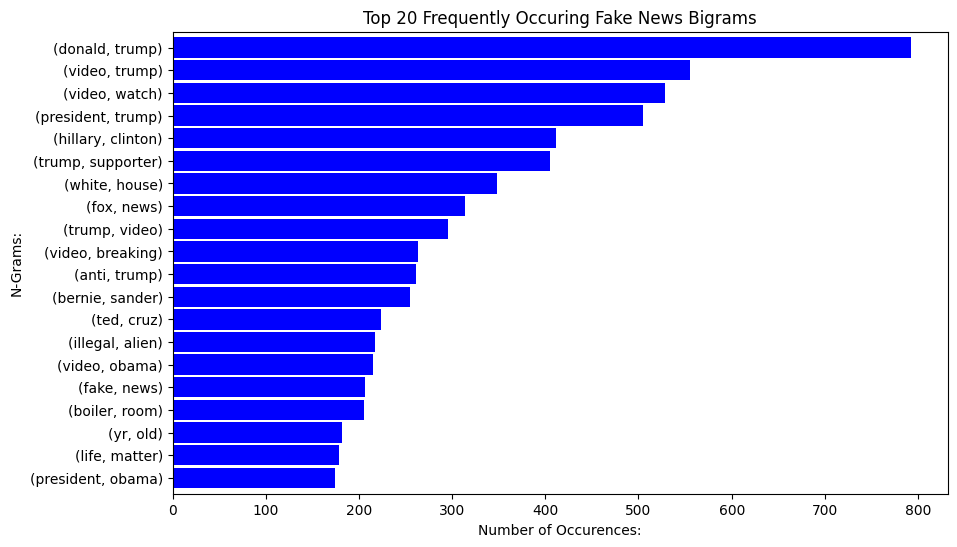

In [20]:
corpus = ' '.join(df[df['label']==0]['title'])
title = 'Top 20 Frequently Occuring Fake News Bigrams'
xlabel = 'Number of Occurences:'
ylabel = 'N-Grams:'
n = 2

plot_ngram_data(corpus, title, xlabel, ylabel, n)

***Top 20 Frequently Occuring REAL News Trigrams***

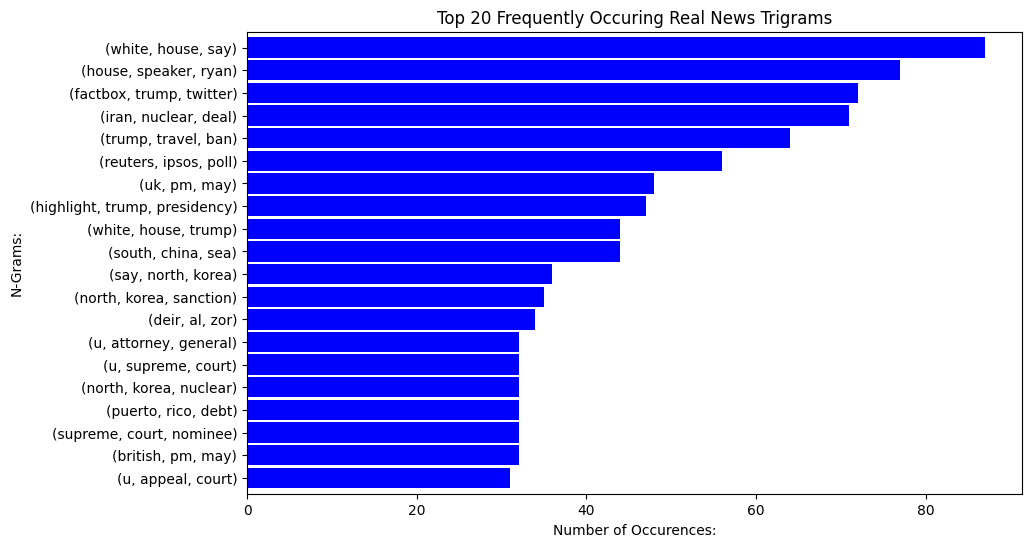

In [21]:
corpus = ' '.join(df[df['label']==1]['title'])
title = 'Top 20 Frequently Occuring Real News Trigrams'
xlabel = 'Number of Occurences:'
ylabel = 'N-Grams:'
n = 3

plot_ngram_data(corpus, title, xlabel, ylabel, n)

***Top 20 Frequently Occuring FAKE News Trigrams***

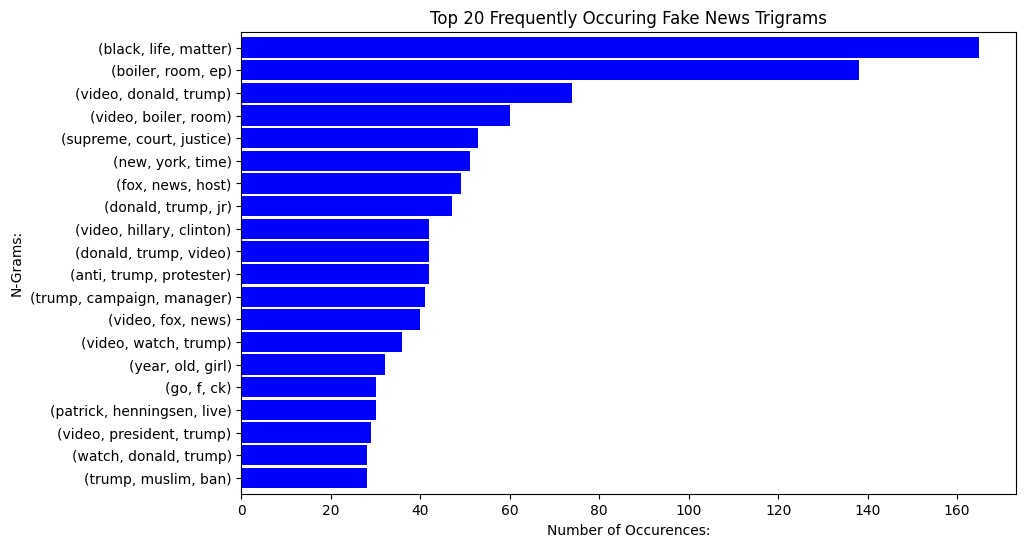

In [22]:
corpus = ' '.join(df[df['label']==0]['title'])
title = 'Top 20 Frequently Occuring Fake News Trigrams'
xlabel = 'Number of Occurences:'
ylabel = 'N-Grams:'
n = 3

plot_ngram_data(corpus, title, xlabel, ylabel, n)

##***(9) Data Preparation***

###***(9.1) Splitting the data into a Train Set, Validation Set, and Test Set***

In [54]:
train_valid_df = df.sample(frac=0.8)
test_df = df.drop(train_valid_df.index)
train_df = train_valid_df.sample(frac=0.8)
valid_df = train_valid_df.drop(train_df.index)

#reset the indices of the dataframes to ensure continuous index values without any gaps
train_df = train_df.reset_index(drop=True)
valid_df = valid_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

print('Train set size:', train_df.shape)
print('Validation set size:', valid_df.shape)
print('Test set size:', test_df.shape)

Train set size: (28734, 3)
Validation set size: (7184, 3)
Test set size: (8980, 3)


***DataFrames to CSV***

In [55]:
train_df.to_csv('train.tsv', sep='\t', index=False)
valid_df.to_csv('valid.tsv', sep='\t', index=False)
test_df.to_csv('test.tsv', sep='\t', index=False)

###***(9.2) Getting Total Number of Words Present in Clean Column***

In [56]:
list_of_words = []
for i in df.clean:
    for j in i:
        list_of_words.append(j)

total_words = len(list(set(list_of_words)))
print('Total number of words: ', total_words)

Total number of words:  16508


###***(9.3) Downloading Punkt From NLTK and Upgrading TensorFlow***

In [57]:
import nltk
nltk.download('punkt')
!pip install --upgrade tensorflow

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


###***(9.4) Performing Tokenization and Padding***

In [58]:
from nltk import word_tokenize
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

#tokenize the title text using word_tokenize from NLTK
train_texts = train_df['title'].tolist()
valid_texts = valid_df['title'].tolist()
test_texts = test_df['title'].tolist()

train_tokens = [word_tokenize(text) for text in train_texts]
valid_tokens = [word_tokenize(text) for text in valid_texts]
test_tokens = [word_tokenize(text) for text in test_texts]

#create a tokenizer and fit on the tokenized texts
tokenizer = Tokenizer(num_words=total_words)
tokenizer.fit_on_texts(train_tokens)

#convert text sequences to sequences of word indexes
train_sequences = tokenizer.texts_to_sequences(train_tokens)
valid_sequences = tokenizer.texts_to_sequences(valid_tokens)
test_sequences = tokenizer.texts_to_sequences(test_tokens)

#pad the sequences to have the same length
max_sequence_length = max(len(seq) for seq in train_sequences + valid_sequences + test_sequences)
train_data = pad_sequences(train_sequences, maxlen=max_sequence_length)
valid_data = pad_sequences(valid_sequences, maxlen=max_sequence_length)
test_data = pad_sequences(test_sequences, maxlen=max_sequence_length)

##***(10) CNN Configuration,Training, Testing and Evaluation***

***CNN Configuration***

In [59]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dropout, Conv1D, MaxPool1D, Flatten, Dense

embedding_vector_features = 40

model = Sequential(name='CNN')
model.add(Embedding(total_words, embedding_vector_features, input_length=35))
model.add(Dropout(0.3))
model.add(Conv1D(32, 5, activation='relu'))
model.add(MaxPool1D())
model.add(Conv1D(32, 5, activation='relu'))
model.add(MaxPool1D())
model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

Model: "CNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 35, 40)            660320    
                                                                 
 dropout_10 (Dropout)        (None, 35, 40)            0         
                                                                 
 conv1d_10 (Conv1D)          (None, 31, 32)            6432      
                                                                 
 max_pooling1d_10 (MaxPoolin  (None, 15, 32)           0         
 g1D)                                                            
                                                                 
 conv1d_11 (Conv1D)          (None, 11, 32)            5152      
                                                                 
 max_pooling1d_11 (MaxPoolin  (None, 5, 32)            0         
 g1D)                                                          

***CNN Training***

***NOTE:***
```
If we get an error in the below cell, we have to adjust the input_length 
hyper-parameter in the above cell to what they found shape = (None, new_input_length)
```

In [60]:
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import time

#convert labels to numpy arrays
train_y = np.asarray(train_df['label'])
valid_y = np.asarray(valid_df['label'])

#shuffle the training data and labels together
indices = np.arange(len(train_data))
np.random.shuffle(indices)
train_data = train_data[indices]
train_y = train_y[indices]

#update input length
max_sequence_length = train_data.shape[1]

#define early stopping callback
early_stopping = EarlyStopping(patience=3, monitor='val_loss', restore_best_weights=True)

#start the timer
start_time = time.time()

#training the model with early stopping
history = model.fit(train_data, train_y, batch_size=64, validation_data=(valid_data, valid_y), epochs=20, callbacks=[early_stopping])

#stop the timer and calculate the training time
training_time = time.time() - start_time

#evaluate the model on test data
y_pred = model.predict(test_data)
y_pred = (y_pred > 0.5)  # Convert probabilities to binary predictions

Epoch 1/20
449/449 [==============================] - 9s 18ms/step - loss: 0.3198 - accuracy: 0.8490 - val_loss: 0.1906 - val_accuracy: 0.9223
Epoch 2/20
449/449 [==============================] - 9s 19ms/step - loss: 0.1449 - accuracy: 0.9437 - val_loss: 0.1783 - val_accuracy: 0.9304
Epoch 3/20
449/449 [==============================] - 9s 21ms/step - loss: 0.1054 - accuracy: 0.9598 - val_loss: 0.1817 - val_accuracy: 0.9335
Epoch 4/20
449/449 [==============================] - 8s 19ms/step - loss: 0.0809 - accuracy: 0.9697 - val_loss: 0.2048 - val_accuracy: 0.9300
Epoch 5/20
281/281 [==============================] - 1s 2ms/step


***CNN Evaluation - Classification Report and Confusion Matrix***

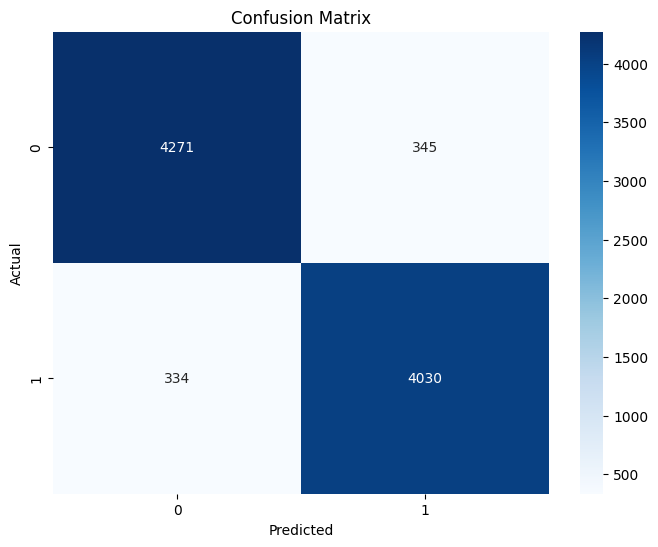


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      4616
           1       0.92      0.92      0.92      4364

    accuracy                           0.92      8980
   macro avg       0.92      0.92      0.92      8980
weighted avg       0.92      0.92      0.92      8980


Training Time: 43.82 seconds


In [61]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# Generate confusion matrix
confusion = confusion_matrix(test_df['label'], y_pred)

# Plot confusion matrix
plot.figure(figsize=(8, 6))
sb.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
plot.xlabel('Predicted')
plot.ylabel('Actual')
plot.title('Confusion Matrix')
plot.show()

# Generate classification report
classification_rep = classification_report(test_df['label'], y_pred)
print('\nClassification Report:')
print(classification_rep)

#print the training time
print("\nTraining Time: {:.2f} seconds".format(training_time))

***Saving the Model***

In [62]:
#save the model
PATH = 'CNN_FOR_FAKE_NEWS_DETECTION.h5'
model.save(PATH)

***Downloading the Model***

In [63]:
#download the model file
from google.colab import files
files.download(PATH)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

***CNN Testing and Results***

In [64]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#load the trained CNN model
PATH = 'CNN_FOR_FAKE_NEWS_DETECTION.h5'
loaded_model = Sequential()
loaded_model = load_model(PATH)

#predict labels for the test dataset
test_pred = loaded_model.predict(test_data)
test_pred_labels = (test_pred > 0.5).astype(int) 

#create a new DataFrame with predicted labels
testing_df = test_df
testing_df = testing_df.drop(columns=["clean"])
testing_df['pred_label'] = test_pred_labels
display(testing_df)

#compute the evaluation metrics
true_labels = testing_df['label'].values
pred_labels = testing_df['pred_label'].values

accuracy = accuracy_score(true_labels, pred_labels)
precision = precision_score(true_labels, pred_labels)
recall = recall_score(true_labels, pred_labels)
f1 = f1_score(true_labels, pred_labels)

#print the evaluation metrics
print("\nAccuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

281/281 [==============================] - 1s 2ms/step


,title,label,pred_label
0,young man sponsored cair invited white house,0,0
1,turkey iraq agree opening second border gate t...,1,1
2,presence russian aircraft fighter jet near u s...,0,1
3,ouch chuck todd humiliates dnc chair sickening...,0,0
4,senate tax chief question border adjustment tax,1,1
...,...,...,...
8975,obama asks u insurer help enrolling young healthy,1,1
8976,breitbart attacked jake tapper hilarious respo...,0,0
8977,lebron james brag well spoken proceeds vocabul...,0,0
8978,ohio fireman deep sh horrible remark saving n,0,0



Accuracy: 0.9243875278396436
Precision: 0.9211428571428572
Recall: 0.9234647112740605
F1-score: 0.9223023229202426


***CNN Testing on User-Defined Text:***

In [65]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from IPython.display import display, clear_output

#load the trained CNN model
PATH = 'CNN_FOR_FAKE_NEWS_DETECTION.h5'
loaded_model = load_model(PATH)

#enter text
user_text = input("Enter text: ")

#tokenize the user-defined text
tokenizer = Tokenizer()
tokenizer.fit_on_texts([user_text]) 
sequences = tokenizer.texts_to_sequences([user_text])
input_data = pad_sequences(sequences, maxlen=max_sequence_length) 

#predict on the user-defined text
prediction = loaded_model.predict(input_data)

clear_output()
print("Enter text: ", user_text)

#interpret the prediction
if prediction[0] > 0.5: 
    print("\nThe user-defined text is predicted as REAL (1).")
else:
    print("\nThe user-defined text is predicted as FAKE (0).")

Enter text:  big scandal about boy being shot dead with a rock

The user-defined text is predicted as FAKE (0).


##***(11) Using and Initialising a New Runtime (GPU Runtime Type Only)***

***For training BERT, it is not required but helpful to change the Runtime Type to GPU***

In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    tf.config.experimental.set_memory_growth(gpus[0], True)
  except RuntimeError as e:
    print(e)

Physical devices cannot be modified after being initialized


##***(12) BERT Configuration, Training, Testing and Evaluation***

***Loading the Tokenizer For BERT***

In [ ]:
import torch
from transformers import BertTokenizerFast

#pretrained model is bert-base-uncased
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased', do_lower_case=True)

***Preprocessing, Tokenizing, and Formatting TSV***

In [ ]:
import pandas as pd
from torch.utils.data import Dataset

class FakeNewsDataset(Dataset):
    def __init__(self, mode, tokenizer):
        assert mode in ['train', 'valid', 'test']
        self.mode = mode
        self.df = pd.read_csv(mode + '.tsv', sep='\t').fillna("")
        self.len = len(self.df)
        self.tokenizer = tokenizer
        
    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        label = row['label']
        title = row['title']
    
        #perform one-hot encoding on the labels
        label_tensor = torch.zeros(2)
        label_tensor[label] = 1
    
        encoding = self.tokenizer.encode_plus(
            title,
            add_special_tokens=True,
            max_length=512,
            padding='max_length',
            return_attention_mask=True,
            truncation=True
        )
    
        tokens_tensor = torch.tensor(encoding['input_ids'])
        attention_mask = torch.tensor(encoding['attention_mask'])
    
        return (tokens_tensor, attention_mask, label_tensor)
    
    def __len__(self):
        return self.len

train_set = FakeNewsDataset('train', tokenizer=tokenizer)
valid_set = FakeNewsDataset('valid', tokenizer=tokenizer)
test_set = FakeNewsDataset('test', tokenizer=tokenizer)

print('train_set size:', train_set.__len__())
print('valid_set size:', valid_set.__len__())
print('test_set size:', test_set.__len__())

train_set size: 28734
valid_set size: 7184
test_set size: 8980


***Reforming Dataframes Using Padding, Extracting Tensors and Creating Data-Loaders, to Fit the Model***

In [ ]:
from torch.utils.data import DataLoader
from torch.nn.utils.rnn import pad_sequence

#collate the individual samples into a batch by padding the sequences and creating masks
def create_mini_batch(samples):
    tokens_tensors = [s[0] for s in samples]
    segments_tensors = [s[1] for s in samples]

    if samples[0][2] is not None:
        label_ids = torch.stack([s[2] for s in samples])
    else:
        label_ids = None

    tokens_tensors = pad_sequence(tokens_tensors, batch_first=True)
    segments_tensors = pad_sequence(segments_tensors, batch_first=True)
    masks_tensors = tokens_tensors != 0

    return tokens_tensors, segments_tensors, masks_tensors, label_ids

***BERT Training: Loading the Pre-Trained Model***

In [ ]:
from transformers import BertForSequenceClassification
from IPython.display import display, clear_output

model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)
clear_output()

***BERT Training: Fine-Tuning BERT-BASE-UNCASED***

In [ ]:
import torch
import time
from torch.utils.data import DataLoader
from transformers import BertTokenizer, AdamW, get_linear_schedule_with_warmup

#set device (GPU if available, else CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

#set hyperparameters (changes made here)
BATCH_SIZE = 12
EPOCHS = 3
LEARNING_RATE = 2e-5
WARMUP_STEPS = 500
EPSILON = 1e-8

#accumulate gradients over a specified number of batches (changes made here)
GRADIENT_ACCUMULATION_STEPS = 6

#create data loaders using the specified batch size
train_loader = DataLoader(train_set, batch_size=BATCH_SIZE, collate_fn=create_mini_batch)
valid_loader = DataLoader(valid_set, batch_size=BATCH_SIZE, collate_fn=create_mini_batch)
test_loader = DataLoader(test_set, batch_size=BATCH_SIZE, collate_fn=create_mini_batch)

#load the pre-trained BERT model for sequence classification
model.to(device)

#set optimizer and learning rate scheduler
optimizer = AdamW(model.parameters(), lr=LEARNING_RATE, eps=EPSILON)
total_steps = len(train_loader) * EPOCHS
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=WARMUP_STEPS, num_training_steps=total_steps)

#define the loss function
loss_fn = torch.nn.BCEWithLogitsLoss().to(device)

#start the timer to calculate the time spent on training this model
start_time = time.time()

for epoch in range(EPOCHS):
    model.train()
    total_loss = 0
    for i, batch in enumerate(train_loader):
        #move tensors to device
        tokens_tensors, segments_tensors, masks_tensors, labels = [tensor.to(device) for tensor in batch]

        #zero the gradients
        optimizer.zero_grad()

        #forward pass
        outputs = model(input_ids=tokens_tensors, token_type_ids=segments_tensors, attention_mask=masks_tensors, labels=labels)
        logits = outputs.logits.squeeze()

        #calculate loss
        loss = loss_fn(logits, labels.float())

        #accumulate gradients
        loss = loss / GRADIENT_ACCUMULATION_STEPS
        loss.backward()

        if (i + 1) % GRADIENT_ACCUMULATION_STEPS == 0:
            #update parameters and learning rate
            optimizer.step()
            scheduler.step()

            #clear gradients
            optimizer.zero_grad()

        total_loss += loss.item()

    avg_loss = total_loss / len(train_loader)

    #print training progress
    print(f"Epoch {epoch + 1}/{EPOCHS} | Average Loss: {avg_loss:.4f}")

end_time = time.time()

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:407: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


***Saving The Model***

In [ ]:
#save the model
PATH = 'BERT_FOR_FAKE_NEWS_DETECTION.pth'
torch.save(model.state_dict(), PATH)

***Downloading the Model***

In [ ]:
#download the model file
from google.colab import files
files.download(PATH)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

***BERT Evaluation - Classification Report and Confusion Matrix***

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

#load the model
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)
model.load_state_dict(torch.load(PATH))

#move the model to the same device as the data
model.to(device)

#evaluation on the validation set
model.eval()
valid_predictions = []
valid_labels_list = []

with torch.no_grad():
    for val_batch in valid_loader:
        #move tensors to the same device
        tokens_tensors, segments_tensors, masks_tensors, labels = [tensor.to(device) for tensor in val_batch]

        #forward pass
        outputs = model(input_ids=tokens_tensors, token_type_ids=segments_tensors, attention_mask=masks_tensors)
        logits = outputs.logits.squeeze()
        predicted_labels = torch.argmax(logits, dim=1)

        valid_predictions.extend(predicted_labels.tolist())
        valid_labels_list.extend(labels.tolist())

#convert predictions and targets to NumPy arrays
valid_predictions = np.array(valid_predictions)
valid_labels = np.array(valid_labels_list)

#convert one-hot encoded targets to binary labels
valid_labels = np.argmax(valid_labels, axis=1)

#generate confusion matrix
confusion = confusion_matrix(valid_labels, valid_predictions)

clear_output()
#plot confusion matrix as a heatmap
target_names = ['0', '1']
sb.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=target_names, yticklabels=target_names)
plot.title("Confusion Matrix")
plot.xlabel("Predicted Labels")
plot.ylabel("True Labels")
plot.show()

#print classification report
print('\nClassification Report: ')
print(classification_report(valid_labels, valid_predictions, target_names=target_names))
training_time = end_time - start_time
print(f"\nTraining Time: {training_time:.2f} seconds")

***BERT Testing and Results***

In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#create DataFrame with predicted labels
df = pd.DataFrame({"pred_label": valid_predictions})

#concatenate the original title, true labels, and predicted labels into a new DataFrame
df_pred = pd.concat([valid_set.df.loc[:, 'title'], valid_set.df.loc[:, 'label'], df.loc[:, 'pred_label']], axis=1)

#display
display(df_pred)

#convert the predicted labels and true labels to numpy arrays
pred_labels = np.array(df_pred['pred_label'])
true_labels = np.array(df_pred['label'])

#compute the evaluation metrics
accuracy = accuracy_score(true_labels, pred_labels)
precision = precision_score(true_labels, pred_labels)
recall = recall_score(true_labels, pred_labels)
f1 = f1_score(true_labels, pred_labels)

#print the evaluation metrics
print("\nAccuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

,title,label,pred_label
0,obama crooked doj hide massive hillary scandal...,0,0
1,yale professor explains exactly need compare t...,0,0
2,u house democratic leader blame russian electr...,1,1
3,light back venezuela five hour blackout,1,1
4,syrian kurdish ypg accuses turkey afrin aggres...,1,1
...,...,...,...
7179,comey say trump told need loyalty expect loyalty,1,1
7180,u lawmaker ask doj terrorism law cover pipelin...,1,1
7181,u approves license ukraine buy small arm u firm,1,1
7182,mike penny dc neighbor invited dine pizzeria t...,0,0



Accuracy: 0.9469654788418709
Precision: 0.9548218940052129
Recall: 0.9361158432708688
F1-score: 0.9453763440860216


***BERT Testing On User-Defined Text:***

In [ ]:
import torch
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

#load the model
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)
model.load_state_dict(torch.load(PATH))

#move the model to the same device as the data
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

#enter text
clear_output()
user_text = input("Enter text: ")

#tokenization
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
tokens = tokenizer.tokenize(user_text)
tokens = ["[CLS]"] + tokens + ["[SEP]"]
input_ids = tokenizer.convert_tokens_to_ids(tokens)
input_ids = torch.tensor(input_ids).unsqueeze(0).to(device)

#evaluation on the user-defined text
model.eval()

with torch.no_grad():
    outputs = model(input_ids)
    logits = outputs.logits.squeeze()
    predicted_label = torch.argmax(logits).item()

#interpret the results
if predicted_label == 0:
    print("The user-defined text is classified as FAKE (0).")
else:
    print("The user-defined text is classified as REAL (1).")

Enter text: obama crooked doj hide massive hillary scandal
The user-defined text is classified as FAKE (0).
